In [1]:
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io
import scipy.optimize as opt

plotly.io.renderers.default = "jupyterlab+png"

In [2]:
# PARAM number of samples
s = 100
samples = pd.Series([f"sample_{j:0{len(str(s))}d}" for j in range(s)], name="Mixture")

# PARAM number of cell types
c = 10
cell_types = pd.Series([f"cell_{i:0{len(str(c))}d}" for i in range(c)], name="cell_type")

if c == 2:
    fraction_values = [(p, 1 - p) for p in np.arange(0, 1, 1.0 / s)]
else:
    # random fractions
    rng = np.random.default_rng(seed=0)
    fraction_values = rng.dirichlet((1,) * c, size=(s,))

fractions = pd.DataFrame(
    fraction_values,
    index=samples,
    columns=cell_types
)

fractions.head()

cell_type,cell_00,cell_01,cell_02,cell_03,cell_04,cell_05,cell_06,cell_07,cell_08,cell_09
Mixture,,,,,,,,,,
sample_000,0.047865,0.071776,0.001394,0.000160,0.038742,0.114742,0.047418,0.053170,0.198291,0.426443
sample_001,0.255735,0.000100,0.176571,0.005641,0.083216,0.066060,0.245112,0.027548,0.023898,0.116118
sample_002,0.004365,0.015964,0.121523,0.091366,0.204978,0.048797,0.052871,0.218474,0.203507,0.038155
sample_003,0.019551,0.113480,0.049938,0.079285,0.097285,0.114303,0.271633,0.014257,0.135976,0.104291
sample_004,0.202405,0.063876,0.049980,0.087135,0.028203,0.079533,0.011310,0.175628,0.243055,0.058875


In [3]:
# PARAM number of genes
g = 20000

genes = pd.Series([f"FAKE{i:0{len(str(g))}d}" for i in range(g)], name="GeneSymbol")

rng = np.random.default_rng(seed=0)

cell_type_geps = pd.DataFrame(
    rng.uniform(low=20.0, high=200.0, size=(g, c)),
    columns=cell_types,
    index=genes
)

In [4]:
rng = np.random.default_rng(seed=0)

mixture_noise = rng.uniform(low=-10.0, high=10.0, size=(g, s))
# mixture_noise = 0

mixtures = cell_type_geps @ fractions.T + mixture_noise

mixtures.iloc[10000:10010]

Mixture,sample_000,sample_001,sample_002,sample_003,sample_004,sample_005,sample_006,sample_007,sample_008,sample_009,...,sample_090,sample_091,sample_092,sample_093,sample_094,sample_095,sample_096,sample_097,sample_098,sample_099
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
FAKE10000,82.431500,119.102289,128.471233,110.849895,125.170086,114.986845,71.661166,99.688743,108.706374,129.869180,...,139.676832,128.836941,111.285957,118.319317,119.975047,118.081849,110.727556,103.522106,125.394809,110.254225
FAKE10001,143.814959,120.221468,132.493743,140.549259,124.706821,108.989325,142.371823,115.349774,144.120999,106.562826,...,118.732777,135.550047,125.336624,123.336012,129.981216,108.295519,117.547498,101.075693,138.940471,135.331246
FAKE10002,144.668029,84.453283,99.192518,105.697647,115.331737,94.849648,124.122243,152.404639,104.902451,108.089282,...,81.433992,89.238874,88.677972,121.010976,105.169281,103.347327,113.738122,132.174308,97.884366,111.004772
FAKE10003,80.716963,127.728322,71.284638,94.601350,97.568180,116.955649,86.408828,91.753811,105.548268,103.026248,...,114.285872,79.881797,104.432251,80.776484,88.592487,111.352840,82.997038,102.434836,81.186792,84.653081
FAKE10004,95.245936,113.793644,108.192843,134.200884,101.594138,101.689407,95.867556,132.089095,121.609121,139.063802,...,146.616830,134.606606,136.310142,144.390386,124.572135,124.997547,117.779879,117.936673,146.534086,109.614395
FAKE10005,66.864181,102.224133,85.522297,96.892119,89.665725,94.626949,72.290738,89.864912,97.977702,109.262064,...,99.202617,123.844883,116.806215,104.690172,98.429260,90.976686,73.385801,86.846935,140.014197,102.646761
FAKE10006,107.083287,67.132631,68.334125,67.093012,60.683365,56.630011,111.477539,99.811831,98.929151,76.440184,...,75.327379,64.750938,66.429281,88.599966,70.014860,77.143291,88.240156,73.282801,90.576253,79.676865
FAKE10007,96.083378,110.571944,89.280474,82.934902,93.626792,95.503741,84.779823,90.687223,113.105595,75.289959,...,100.013428,89.768234,76.316286,70.745855,99.688340,88.792187,86.931681,77.958231,78.298645,79.109748
FAKE10008,109.263468,114.882489,106.804173,95.222605,100.766057,81.671209,121.047607,112.310805,125.889826,79.869923,...,101.156671,98.512597,90.496763,94.889757,113.450759,102.475195,119.189568,124.281106,105.157506,92.503011


In [5]:
for gth_gene, gene in enumerate(genes):
    print()
    print(gene)
    %time
    if gth_gene > 5:
        break
    imputed_per_cell_type, error = opt.nnls(fractions, mixtures.iloc[gth_gene])
    print("- imputed", imputed_per_cell_type)
    print("- known  ", cell_type_geps.loc[gene].values.T)


FAKE00000
CPU times: user 38 µs, sys: 15 µs, total: 53 µs
Wall time: 10 µs
- imputed [134.56704992  72.63082554  30.41954192  21.25720089 164.67761042
 187.3184556  135.63232987 155.17856455 115.58568943 183.58476732]
- known   [134.65310372  68.56160848  27.37523431  22.9749744  166.38864306
 184.29600391 129.19443964 151.30938098 117.85249846 188.31303628]

FAKE00001
CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 5.01 µs
- imputed [151.5856623   27.16876851 184.81853756  30.09676411 153.12251458
  46.98303453 173.24338462 124.01166892  76.70861015  92.29835924]
- known   [166.85363974  20.49293003 174.33276979  26.04540355 151.33798036
  51.61801171 175.37220602 117.46301964  73.9481403   96.08369982]

FAKE00002
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
- imputed [ 29.30504777  40.84963352 136.94914241 139.15418868 133.60151159
  79.85703733 202.03408585 200.33389764 155.07128052 133.73901085]
- known   [ 25.09754081  42.37098977 140.71239464 136.49411

In [6]:
%time

cell_type_geps_inferred = pd.DataFrame.from_dict(
    {
        gene: opt.nnls(fractions, mixtures.iloc[gth_gene])[0]
        for gth_gene, gene in enumerate(genes)
#         if gth_gene < 5
    },
    orient='index',
    columns=cell_types,
).rename_axis(index='GeneSymbol')

cell_type_geps_inferred.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


cell_type,cell_00,cell_01,cell_02,cell_03,cell_04,cell_05,cell_06,cell_07,cell_08,cell_09
GeneSymbol,,,,,,,,,,
FAKE00000,134.567050,72.630826,30.419542,21.257201,164.677610,187.318456,135.632330,155.178565,115.585689,183.584767
FAKE00001,151.585662,27.168769,184.818538,30.096764,153.122515,46.983035,173.243385,124.011669,76.708610,92.298359
FAKE00002,29.305048,40.849634,136.949142,139.154189,133.601512,79.857037,202.034086,200.333898,155.071281,133.739011
FAKE00003,147.014077,89.414336,33.272714,155.425772,116.572327,74.307105,114.330119,166.764078,191.018429,89.834545
FAKE00004,129.197953,73.917994,117.878800,85.444160,93.767454,177.762770,60.221517,138.035556,35.856381,171.964853


In [7]:
errors = cell_type_geps - cell_type_geps_inferred

In [8]:
errors.head()

cell_type,cell_00,cell_01,cell_02,cell_03,cell_04,cell_05,cell_06,cell_07,cell_08,cell_09
GeneSymbol,,,,,,,,,,
FAKE00000,0.086054,-4.069217,-3.044308,1.717774,1.711033,-3.022452,-6.437890,-3.869184,2.266809,4.728269
FAKE00001,15.267977,-6.675838,-10.485768,-4.051361,-1.784534,4.634977,2.128821,-6.548649,-2.760470,3.785341
FAKE00002,-4.207507,1.521356,3.763252,-2.660077,-2.832192,9.204922,-2.536297,-3.783537,-11.673723,3.343659
FAKE00003,-3.093665,0.591520,11.044657,-5.557871,-2.008549,1.536432,-6.879754,13.343732,-2.890596,-5.431409
FAKE00004,-6.322583,4.018497,9.095206,-4.620139,-3.276034,2.486614,0.666849,-5.861870,-0.733619,-2.088906


In [9]:
rng = np.random.default_rng(seed=0)

rng.choice(errors.values.flatten(), size=10)

array([ -2.85198228,  -4.71316979,  -0.87191789, -12.52722935,
         6.84260786, -10.87160491,   4.34881113,   5.83958597,
         3.96307953,  -2.28247041])

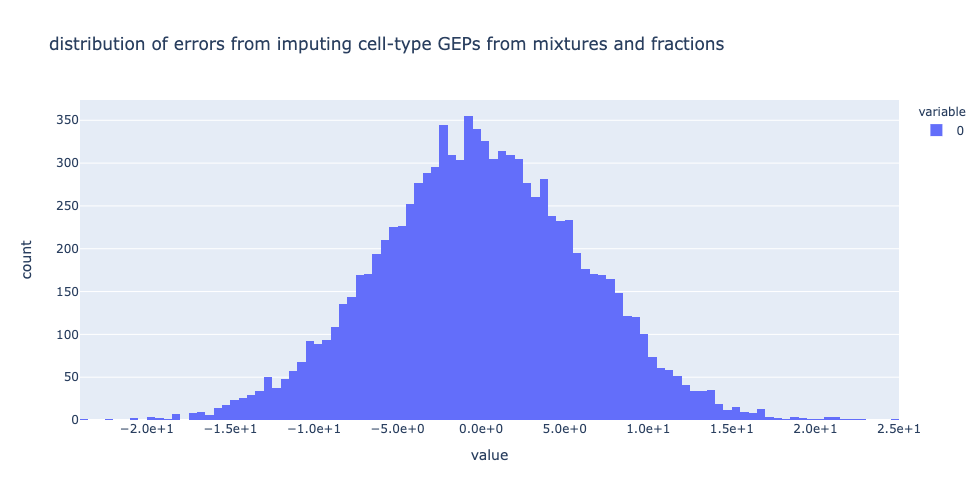

In [10]:
rng = np.random.default_rng(seed=0)

fig = px.histogram(
    rng.choice(errors.values.flatten(), size=10000),
    title="distribution of errors from imputing cell-type GEPs from mixtures and fractions"
)
fig.update_layout(xaxis={'tickformat':'.1e'})

In [11]:
opt.nnls?

Signature: opt.nnls(A, b, maxiter=None)
Docstring:
Solve ``argmin_x || Ax - b ||_2`` for ``x>=0``. This is a wrapper
for a FORTRAN non-negative least squares solver.

Parameters
----------
A : ndarray
    Matrix ``A`` as shown above.
b : ndarray
    Right-hand side vector.
maxiter: int, optional
    Maximum number of iterations, optional.
    Default is ``3 * A.shape[1]``.

Returns
-------
x : ndarray
    Solution vector.
rnorm : float
    The residual, ``|| Ax-b ||_2``.

See Also
--------
lsq_linear : Linear least squares with bounds on the variables

Notes
-----
The FORTRAN code was published in the book below. The algorithm
is an active set method. It solves the KKT (Karush-Kuhn-Tucker)
conditions for the non-negative least squares problem.

References
----------
Lawson C., Hanson R.J., (1987) Solving Least Squares Problems, SIAM

 Examples
--------
>>> from scipy.optimize import nnls
...
>>> A = np.array([[1, 0], [1, 0], [0, 1]])
>>> b = np.array([2, 1, 1])
>>> nnls(A, b)
(array([1